## Assessment 1 - Counts

In [1]:
#Program that uses a function that counts number of occurances in a list and adds to dictionary
#input['A', 'A', 'B', 'C', 'A']
#result{'A': 3, 'B': 1, 'C': 1} 

In [2]:
input = ['A', 'A', 'B', 'C', 'A']

In [3]:
input

['A', 'A', 'B', 'C', 'A']

Test .count()

In [4]:
input.count('A')

3

In [5]:
input.count('B')

1

Initially I toyed with the idea of for loops and counters, but I realised to just combine 2 lists of my outputs is much simpler. Counting the characters of the "keys" list in the original input. 
Trying to replicate the desired result without furmula.

In [6]:
keys1 = []
countval1 = []

In [7]:
for val in input:
    if val not in keys1:
         keys1.append(val)
keys1

['A', 'B', 'C']

In [8]:
for n in keys1:
    ans = input.count(n)
    countval1.append(ans)
countval1

[3, 1, 1]

I got the below zip method from the below page: method 3.

https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

In [9]:
dictout1 = dict(zip(keys1, countval1))

In [10]:
dictout1

{'A': 3, 'B': 1, 'C': 1}

Ok, the desired output has been achieved, this should be pretty simple to put into a function now

In [11]:
def counts(x):
    keys = []
    countval = []
    for val in x:
        if val not in keys:
            keys.append(val)
    for n in keys:
        ans = x.count(n)
        countval.append(ans)
    dictout = dict(zip(keys, countval))
    return dictout

In [12]:
counts(input)

{'A': 3, 'B': 1, 'C': 1}

In [13]:
counts(['A', 'A', 'B', 'C', 'A'])    

{'A': 3, 'B': 1, 'C': 1}

<b>

## Assessment 2 - dicerolls

Python function that rolls $k$ number of dice, $n$ times.
Results of the $n$ rolls should be kept in a dictionary with keys,vals == the frequency of each possible outcome i.e 1-12.

Initially I was messsing aroun with 

In [14]:
import numpy as np
import pandas as pd

In [15]:
rng = np.random.default_rng()

Simulate 1 dice roll 100 times.

In [16]:
diceroll = rng.integers(1,7, size =[100,1])

Check the length of the array, should ==100

In [17]:
len(diceroll)

100

Simulate 2 dice rolls

In [18]:
diceroll = rng.integers(1,7, size =[1000,2])

Check the returned array is the right shape

In [19]:
diceroll.shape

(1000, 2)

Create a pandas dataframe from the array, labelling the columns

In [20]:
df_diceroll = pd.DataFrame(diceroll, columns=["roll1", "roll2"])

Sum the columns to a new column

Summing columns:
https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns/34023971

In [21]:
df_diceroll['sum'] = df_diceroll.sum(axis=1)

Create a dict of value counts in a dictionary

https://stackoverflow.com/questions/36004976/count-frequency-of-values-in-pandas-dataframe-column

In [22]:
resultcount = df_diceroll['sum'].value_counts().to_dict()

In [23]:
resultcount

{7: 164,
 6: 139,
 8: 136,
 9: 119,
 10: 100,
 5: 98,
 4: 92,
 3: 58,
 11: 42,
 2: 28,
 12: 24}

Create the function with the arguments $k$ and $n$ and test

In [24]:
def diceroll(k, n):
    dicerl = rng.integers(1,7, size =[n,k])
    df = pd.DataFrame(dicerl, columns=["roll1", "roll2"])
    df['sum'] = df.sum(axis=1)
    rescnt = df['sum'].value_counts().to_dict()
    return rescnt

In [25]:
diceroll(2,1000)

{7: 154,
 8: 142,
 6: 142,
 9: 120,
 5: 113,
 10: 80,
 4: 78,
 11: 68,
 3: 49,
 2: 28,
 12: 26}

<b>

### Task 3

Simulating a coin-flip with numpy.random.binomial to 100  and then 1,000 times and plot the results, showing the bell curve.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
coinres = rng.binomial(100,.50, size = 1000)


In [28]:
coinres_df = pd.DataFrame(coinres, columns = ['numhead'])

In [29]:
coinres_df

,numhead
0,52
1,45
2,47
3,50
4,53
...,...
995,56
996,53
997,52
998,48


In [30]:
num, occs = np.unique(coinres, return_counts=  True)

In [31]:
occs

array([ 1,  4,  1,  5,  7, 21, 18, 27, 38, 50, 61, 79, 71, 84, 86, 78, 79,
       63, 65, 47, 34, 22, 25, 10,  9,  4,  3,  3,  3,  1,  1],
      dtype=int64)

https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [32]:
num, occs = np.unique(coinres, return_counts=  True)
print(num)
print(occs)

[33 36 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 67]
[ 1  4  1  5  7 21 18 27 38 50 61 79 71 84 86 78 79 63 65 47 34 22 25 10
  9  4  3  3  3  1  1]


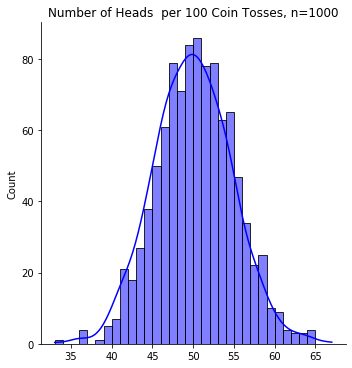

In [57]:
ax = sns.displot(coinres, kde = True,bins = range(33, 66), color = 'b')
plt.title('Number of Heads  per 100 Coin Tosses, n=1000');

<b>

### Task 4

### Simpsons Paradox

Simpsons Paradox is a phennomenon in probability & statisctics whereby a trend observed in several different groups of data will no longer appear/be reversed in a combined set of the data[1]. 

Personally I found the below example as the most straight forward of the examples provided when first encountering the paradox.

Say we have 2 professional baseball batters' batting statistics taken across 2 years, one, Batter A, can have a worse batting average( no of bats/ no. of at bats) across the two season in the data than Batter B, but when the two years are aggregated, Batter A will have the more favourable battgn average.



| Batter | 1995 | 1996 | Combined
| --- | -: | -: | -:|
| Derek Jeter | 12/48	|183/582	|	195/630|
| Batting Avg | .250	|	.314|		<b>.310<b>|
|
|David Justice	|104/411	|	45/140	|	149/551	|
| Batting Avg |	<b>.253<b>|		<b>.321<b>|		.270|

You can see from the above table that in 1995 & 1996 David Justice's batting average is better that Derek Jetter's, however once combined, we can see that Jeter's batting record is better across both years. This happens due to the large dfifference between the number of at bats between the years, as we can see Jeter was only at bat 48 times in 1995 compared to 582 in 1996, and the opposite for David Justice.

<b>

Another example of this paradox, which will be the bulk of the remainder of this document, is where the phenomenon presetns itself in data which, when viewed in groups will appear to present one picture, however when the data are grouped together, the observed picture is reversed, as happened in the UC Berkeley Gender Bias study, where the data overall presented that there was a gender bias occurring against female applicants, however when the researchers looked at the data across each department the results were reversed and a bias in farour of women was observed. [2]

<b>

In the below image (fig1) you can see the trend discussed above, both sets of data(lines) are sloping positively and one would assume, if looking at the blue line individually, that increasing values of $x$ will provide increasing values of $y$, however, upon looking at the whole dataset, we can see that increasing values of $x$ provide decrasing values of $y$ accross both groups.

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Simpson%27s_paradox_continuous.svg/390px-Simpson%27s_paradox_continuous.svg.png)

I will create a bit more of a fleshed out version of the above dataset, as requested per the task statement we will create 4 lines to display the paradox. In creating the data, I worked on the assumption that this is a fictional dataset used to display how Simpson's Paradox can occur and how it can be a pitfall for analysits of the dataset. 

Firstly let's import our modules:

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit

Set up our random generator and seed

In [36]:
rng = np.random.default_rng(seed = 42)

We are going to create arrays of 100 vales

In [37]:
n_samples = 100

The below function saves $x$, and $y$ values to a Pandas DataFrame using np.linspace for the x values, and passing those $x$ values, alongside the varialbes of $a$ and $b$ into the equation $y = mx + c$ for $y$

In [38]:
def xy_cords(x_start, x_end, a, b):
    ans = np.linspace(x_start,x_end, num=n_samples)
    for i in ans:
        y= a*ans + (b - rng.normal(2, 4, n_samples))
    return pd.DataFrame({'x_axis': ans, 'y_axis': y})

In [39]:
xy_a = xy_cords(1, 4, 6, 7)
xy_b = xy_cords(4, 8, 3, 1)
xy_c = xy_cords(8, 12, 2, -2)
xy_d = xy_cords(12, 16, 1, -4)

Let's take a look at xy_a and see what our data looks like:

In [40]:
xy_a

,x_axis,y_axis
0,1.000000,16.297412
1,1.030303,10.180822
2,1.060606,7.058936
3,1.090909,10.101266
4,1.121212,12.115335
...,...,...
95,3.878788,21.792303
96,3.909091,28.707265
97,3.939394,28.295369
98,3.969697,24.319205


For each xy_ group generate, I'm going to add a group in a new column, this will make visualising the dataset much easier.

In [41]:
xy_a ['group'] = 'A'
xy_b ['group'] = 'B'
xy_c ['group'] = 'C'
xy_d ['group'] = 'D'

Ok, lets take a quick look at the data from xy_a and see if we can make any obsertvations.

In [42]:
def relplot(data, x,y,color):
       return sns.relplot(data= data,x= x, y = y, color = color)

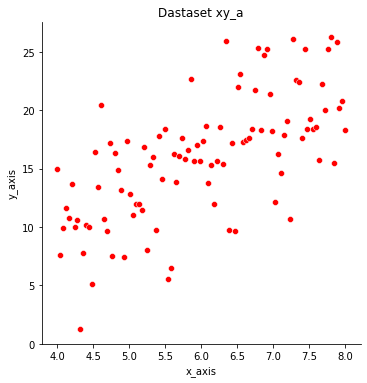

In [43]:
relplot(xy_b,'x_axis','y_axis', 'r')
plt.title('Dastaset xy_a');

So from briefly looking at the above graph ,it looks like increasing values of $x$ will produce increasing values of $y$. Let's have a quick look at another group and see if we can spot the same trend.

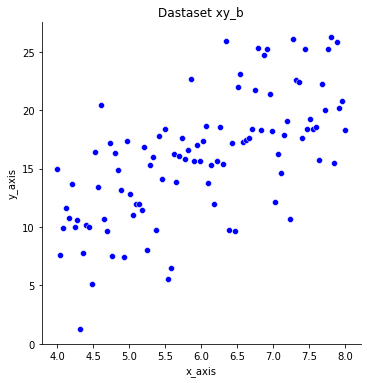

In [44]:
relplot(xy_b,'x_axis', 'y_axis', 'b')
plt.title('Dastaset xy_b');

Ok, this looks very simliar to the previous graph. So for our observations thus far we can say as the vlaue of $x$ increases, as does the value of $y$. Let's combine the datasets and see what conclusions we can draw.

In [45]:
allsets= [xy_a, xy_b, xy_c,xy_d]

In [46]:
combined= pd.concat(allsets)

We will use a seaborn.lmplot to map out our combined dataset and see if the observation made previuously are upheld. lmplot

In [47]:
def implot(data, x, y):
    return sns.lmplot(data= data, x = x, y = y, ci = None)

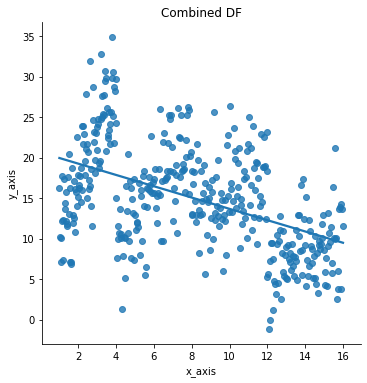

In [48]:
implot(combined, 'x_axis','y_axis')
plt.title('Combined DF');

Upon observation of the whole dataset, it's obvious from the regression line that there is a negative correlation between the value of $x$ and the value of $y$.

We can take this one step further and graph by the groups we established earlier.

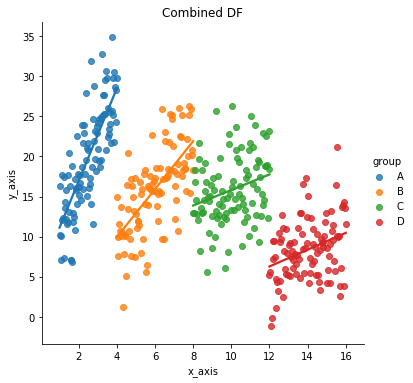

In [49]:
sns.lmplot(data= combined, x = 'x_axis', y = 'y_axis', hue = 'group',ci = None)
plt.title('Combined DF');

When the dataset is graphed by group, the regression line produced from the lmplot function denotes a positive correlation between x and y. Let's take a further look at these regression values using np.polyfit imported above.

In [50]:
poly_A = np.polyfit(xy_a['x_axis'], xy_a['y_axis'], 1)
poly_B = np.polyfit(xy_b['x_axis'], xy_b['y_axis'], 1)
poly_C = np.polyfit(xy_c['x_axis'], xy_c['y_axis'], 1)
poly_D = np.polyfit(xy_d['x_axis'], xy_d['y_axis'], 1)

In [51]:
grp_poly = {'A': poly_A, 'B':poly_B, 'C':poly_C, 'D':poly_D}

In [52]:
combined_a_coef, combined_b_coef = np.polyfit(combined['x_axis'], combined['y_axis'], 1)

In [53]:
print("Slope of Total: {:.3f}".format(combined_a_coef))
for key, val in grp_poly.items():
    counter = 0
    print ("Slope of Group {}: {:.3f}".format(key[counter], val[0]))
    counter +=1

Slope of Total: -0.698
Slope of Group A: 5.787
Slope of Group B: 2.994
Slope of Group C: 0.971
Slope of Group D: 1.048


So according to what we can see, a test for if the Simpson's Paradoxis occuring is if the slope of the combined dataset is of a differnt nature to the subsets within.

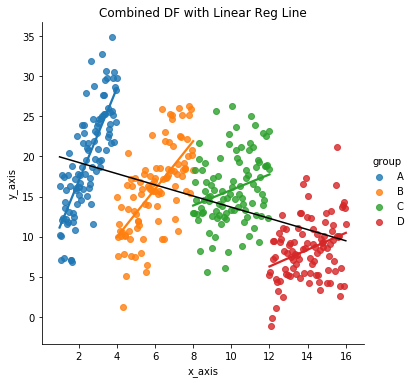

In [54]:
sns.lmplot(data= combined, x = 'x_axis', y = 'y_axis', hue  = 'group', ci = None)
plt.plot(combined['x_axis'],combined_a_coef * combined['x_axis'] + combined_b_coef, '-', color = 'k')
plt.title('Combined DF with Linear Reg Line');

Let's see if we can replicate fig1 from earlier by plotting each of polyfit coordingates to our grid.

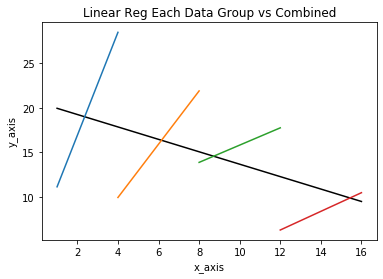

In [55]:
plt.plot(combined['x_axis'],combined_a_coef * combined['x_axis'] + combined_b_coef, '-', color = 'k')
plt.plot(xy_a['x_axis'], grp_poly['A'][0]*xy_a['x_axis']+ grp_poly['A'][1], '-')
plt.plot(xy_b['x_axis'], grp_poly['B'][0]*xy_b['x_axis']+ grp_poly['B'][1], '-')
plt.plot(xy_c['x_axis'], grp_poly['C'][0]*xy_c['x_axis']+ grp_poly['C'][1], '-')
plt.plot(xy_d['x_axis'], grp_poly['D'][0]*xy_d['x_axis']+ grp_poly['D'][1], '-')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Linear Reg Each Data Group vs Combined');

References:
1. https://en.wikipedia.org/wiki/Simpson's_paradox
2. https://en.wikipedia.org/wiki/Simpson%27s_paradox#UC_Berkeley_gender_bias

https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9

https://commons.wikimedia.org/wiki/File:Simpsons_paradox_-_animation.gif

https://commons.wikimedia.org/wiki/File:Simpson%27s_paradox_continuous.svg

https://medium.com/analytics-vidhya/simpsons-paradox-when-you-derive-a-wrong-insight-from-your-analysis-ee488b346427